In [2]:
Import Packages

In [3]:
import numpy
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [4]:
Load Data

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
Analysing Data

In [6]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [9]:
y_train[5]

2

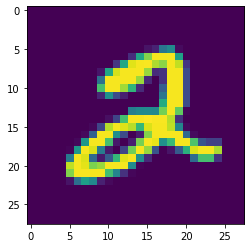

In [10]:
plt.imshow(X_train[5])

In [10]:
Data preprocessing

In [11]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

In [12]:
number_of_classes = 10
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)
Y_train[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [12]:
Model Creating

In [13]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(number_of_classes, activation="softmax"))

In [14]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

In [15]:
Train the model

In [16]:
model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_test,Y_test))

Epoch 1/5
1875/1875 [==============================] - 189s 100ms/step - loss: 0.2139 - accuracy: 0.9511 - val_loss: 0.0803 - val_accuracy: 0.9745
Epoch 2/5
1875/1875 [==============================] - 186s 99ms/step - loss: 0.0647 - accuracy: 0.9804 - val_loss: 0.0987 - val_accuracy: 0.9714
Epoch 3/5
1875/1875 [==============================] - 186s 99ms/step - loss: 0.0489 - accuracy: 0.9847 - val_loss: 0.0913 - val_accuracy: 0.9768
Epoch 4/5
1875/1875 [==============================] - 186s 99ms/step - loss: 0.0359 - accuracy: 0.9889 - val_loss: 0.0945 - val_accuracy: 0.9769
Epoch 5/5
1875/1875 [==============================] - 186s 99ms/step - loss: 0.0323 - accuracy: 0.9898 - val_loss: 0.0921 - val_accuracy: 0.9777


In [16]:
Test the model

In [17]:
metrics = model.evaluate(X_test, Y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

Metrics (Test Loss & Test Accuracy): 
[0.09209626168012619, 0.9776999950408936]


In [18]:
Metrics (Test Loss & Test Accuracy): 
[0.14486223459243774, 0.9688000082969666]

In [19]:
prediction = model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 88ms/step
[[2.80209753e-12 2.25205398e-17 4.34237498e-12 1.60923932e-07
  5.55151618e-19 1.30744939e-14 9.73273840e-19 9.99999881e-01
  4.94595207e-12 1.31321051e-10]
 [2.37205307e-12 3.01298902e-10 1.00000000e+00 1.85487866e-14
  4.56382096e-18 2.44047982e-19 1.10858163e-10 4.43853166e-27
  2.95853404e-15 2.33216768e-22]
 [2.41096387e-07 9.99441803e-01 1.32721323e-06 2.00103351e-10
  1.00752826e-04 6.20592573e-08 3.29614345e-08 8.05513821e-07
  4.54623252e-04 2.06117633e-07]
 [9.99999523e-01 1.47539262e-13 4.11500967e-09 1.08887447e-13
  4.95661888e-13 5.98537886e-11 6.64144082e-08 5.46843387e-13
  3.38185369e-10 3.63405746e-07]]


In [20]:
print(numpy.argmax(prediction, axis=1))
print(Y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
